In [3]:
import cv2
import mediapipe as mp
import numpy as np
import uuid #allow uniform unique identify 
import os #op sys 

In [4]:
mp_drawing = mp.solutions.drawing_utils #to draw the landmarks
mp_hands = mp.solutions.hands #to draw the hand 

# 2. Draw Hands
<img src=https://i.imgur.com/qpRACer.png />

In [5]:
from cv2 import VideoCapture

In [6]:
cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands: #with mp utils of hand do :
    #min_dete_conf = 80% we want that our detection to be 80% 
    #min_track_conf=50% and this is the tracking
    #bc when we give the frame to mediapipe it will detect and track the hand
    #we can also add a maxhands to detect more than 2(which is default)
    while cap.isOpened():
        ret, frame = cap.read()
        #bc hands from mp work in RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = cv2.flip(image, 1)
        
        #to not draw
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # display
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks: #cheking if theres any results
            for num, hand in enumerate(results.multi_hand_landmarks): #looping on each results
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, 
                                        mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=3),#lines
                                        mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=1, circle_radius=2),#landmark 
                                         )
            
        
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
results.multi_hand_landmarks

[landmark {
   x: 0.078518807888031
   y: 0.6971427798271179
   z: 6.196367507982359e-07
 }
 landmark {
   x: 0.16935506463050842
   y: 0.7589224576950073
   z: -0.0508425273001194
 }
 landmark {
   x: 0.28516054153442383
   y: 0.7604249715805054
   z: -0.06695429235696793
 }
 landmark {
   x: 0.3807191252708435
   y: 0.73859703540802
   z: -0.0783204510807991
 }
 landmark {
   x: 0.4542338252067566
   y: 0.7449195384979248
   z: -0.08838079869747162
 }
 landmark {
   x: 0.3550497889518738
   y: 0.5796982645988464
   z: -0.034364525228738785
 }
 landmark {
   x: 0.4532833695411682
   y: 0.5256138443946838
   z: -0.0580553375184536
 }
 landmark {
   x: 0.5110189914703369
   y: 0.4856826066970825
   z: -0.077928826212883
 }
 landmark {
   x: 0.5585982799530029
   y: 0.4483710527420044
   z: -0.0941530168056488
 }
 landmark {
   x: 0.32478997111320496
   y: 0.5021244287490845
   z: -0.03127278387546539
 }
 landmark {
   x: 0.4176694452762604
   y: 0.4122088551521301
   z: -0.0524919629096

# Save 

In [8]:
os.mkdir('Output Images')

FileExistsError: [WinError 183] Impossible de créer un fichier déjà existant: 'Output Images'

In [9]:
cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, 
                                        mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                        mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),
                                         )
            
        # Save our image    
        cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

## Detect left and right


In [10]:
#mediapipe have a native right and left hand 
results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.PINKY_TIP] #from the last frame
#[] to add 0 for one hand 
#pinkytips is for a specific landmark

x: 0.399975061416626
y: 0.03811904788017273
z: -0.12444417923688889

In [11]:
results.multi_handedness
#so now we have to write a fct to make it appear which hand it is detecting

[classification {
   index: 0
   score: 0.9826259613037109
   label: "Left"
 }]

In [12]:
#to get the index and the hands and results give the compleeeete res
def get_label(index, hand, results) :
    output = None #final var 
    for idx, classification in enumerate(results.multi_handedness): #looping on each elem
        if classification.classification[0].index == index:
            #process the res
            label = classification.classification[0].label #
            score = classification.classification[0].score
            txt = '{} {}'.format(label, round(score,2))#round 2 to have only two num 

            #extract coordiante
            coords = tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.WRIST].x, hand.landmark[mp_hands.HandLandmark.WRIST].y)),
                #just extracting the coord of the wrist and put them into a numpy array
                [640,480]).astype(int))
        
            output = txt , coords

    return output
    
            
        

In [13]:
mp_hands.HandLandmark.WRIST
results.multi_hand_landmarks[1]

IndexError: list index out of range

In [14]:
cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, 
                                        mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                        mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),
                                         )
                
                # Render left or right detection
                if get_label(num, hand, results):
                     #Font.... requirement i got from CV2
                    text, coord = get_label(num, hand, results)
                    cv2.putText(image, text, coord, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
                    
               
            
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

## calculate Angles

In [15]:
from matplotlib import pyplot as plt

In [16]:
 
joint_list = [[8,7,6], [12,11,10], [4,3,2], [18,19,20]] #to calculate two angles

def draw_finger_angles(image,results,joint_list) : 
    for hand in results.multi_hand_landmarks :
        #loop through diff hand
        for joint in joint_list :
            #and diff joints sets
            a = np.array([hand.landmark[joint[0]].x,hand.landmark[joint[0]].y])#first coord
            b = np.array([hand.landmark[joint[1]].x,hand.landmark[joint[1]].y])#seco    
            c = np.array([hand.landmark[joint[2]].x,hand.landmark[joint[2]].y])#third

            radians = np.arctan2(c[1] -b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
            angle=np.abs(radians*180.0/np.pi)

            if angle > 180.0 :
                angle= 360 - angle

            cv2.putText(image, str(round(angle,2)), tuple(np.multiply(b, [640,480]).astype(int)),
               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0),2,cv2.LINE_AA)
    return image

        

In [17]:
hand = results.multi_hand_landmarks[0]
joint = joint_list[0]

In [20]:
hand.landmark[joint[1]] #coords for one joint

x: 0.6133208274841309
y: 0.44644567370414734
z: -0.08747215569019318

In [21]:
test_image = draw_finger_angles(image,results, joint_list)

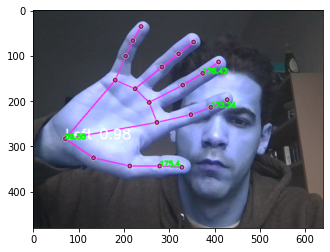

In [22]:
plt.imshow(test_image)

In [24]:
cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, 
                                        mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                        mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),
                                         )
                
                # Render left or right detection
                if get_label(num, hand, results):
                     #Font.... requirement i got from CV2
                    text, coord = get_label(num, hand, results)
                    cv2.putText(image, text, coord, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
                
                #show the angle that I calculated from joint list
                draw_finger_angles(image,results,joint_list)
                    
               
            
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti